In [89]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

In [55]:
# Set random seed
np.random.seed(42)

# Load data
df = pd.read_csv('../Data/MSFT_historical_data_yfinance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-12-13,31.509763,31.535026,30.836118,30.895061,40066100
2013-12-16,30.928732,31.156088,30.768743,31.063461,31734200
2013-12-17,31.105562,31.248713,30.591910,30.751900,45687700
2013-12-18,30.617180,30.819271,29.918271,30.802433,63192100
2013-12-19,30.743483,30.777166,30.381401,30.524549,34160100


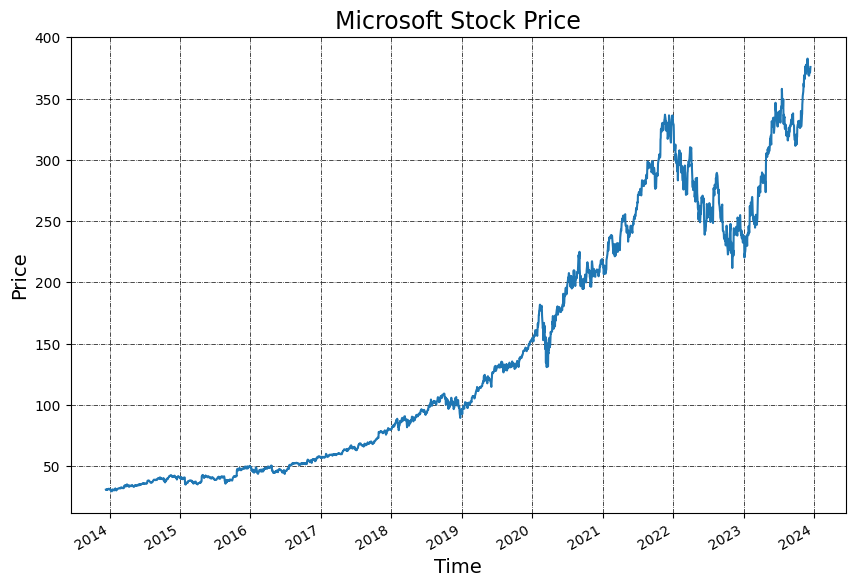

In [50]:
# Plot data
df['Close'].plot(figsize=(10,7))
plt.title('Microsoft Stock Price',fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.show()

In [51]:
def create_train_test_test(df_Stock):
    features = df_Stock.drop(['Close'],axis=1)
    target = df_Stock['Close']
    
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))
    
    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))
    
    print('Test Set length - ', str(int(data_len * 0.02)))
    
    #Splitting features and target into train, validation and test examples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]
    
    #Print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test


X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_test(df)
X_train.columns


Historical Stock Data length is -  2517
Training Set length -  2214
Validation Set length -  251
Test Set length -  50
(2214, 4) (251, 4) (52, 4)
(2214,) (251,) (52,)


Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [95]:
lr = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
svm = SVR()


In [96]:
def generate_prediction(model,X_train,X_val,X_test):
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    Y_test_pred = model.predict(X_test)
    return (Y_train_pred,Y_val_pred,Y_test_pred)

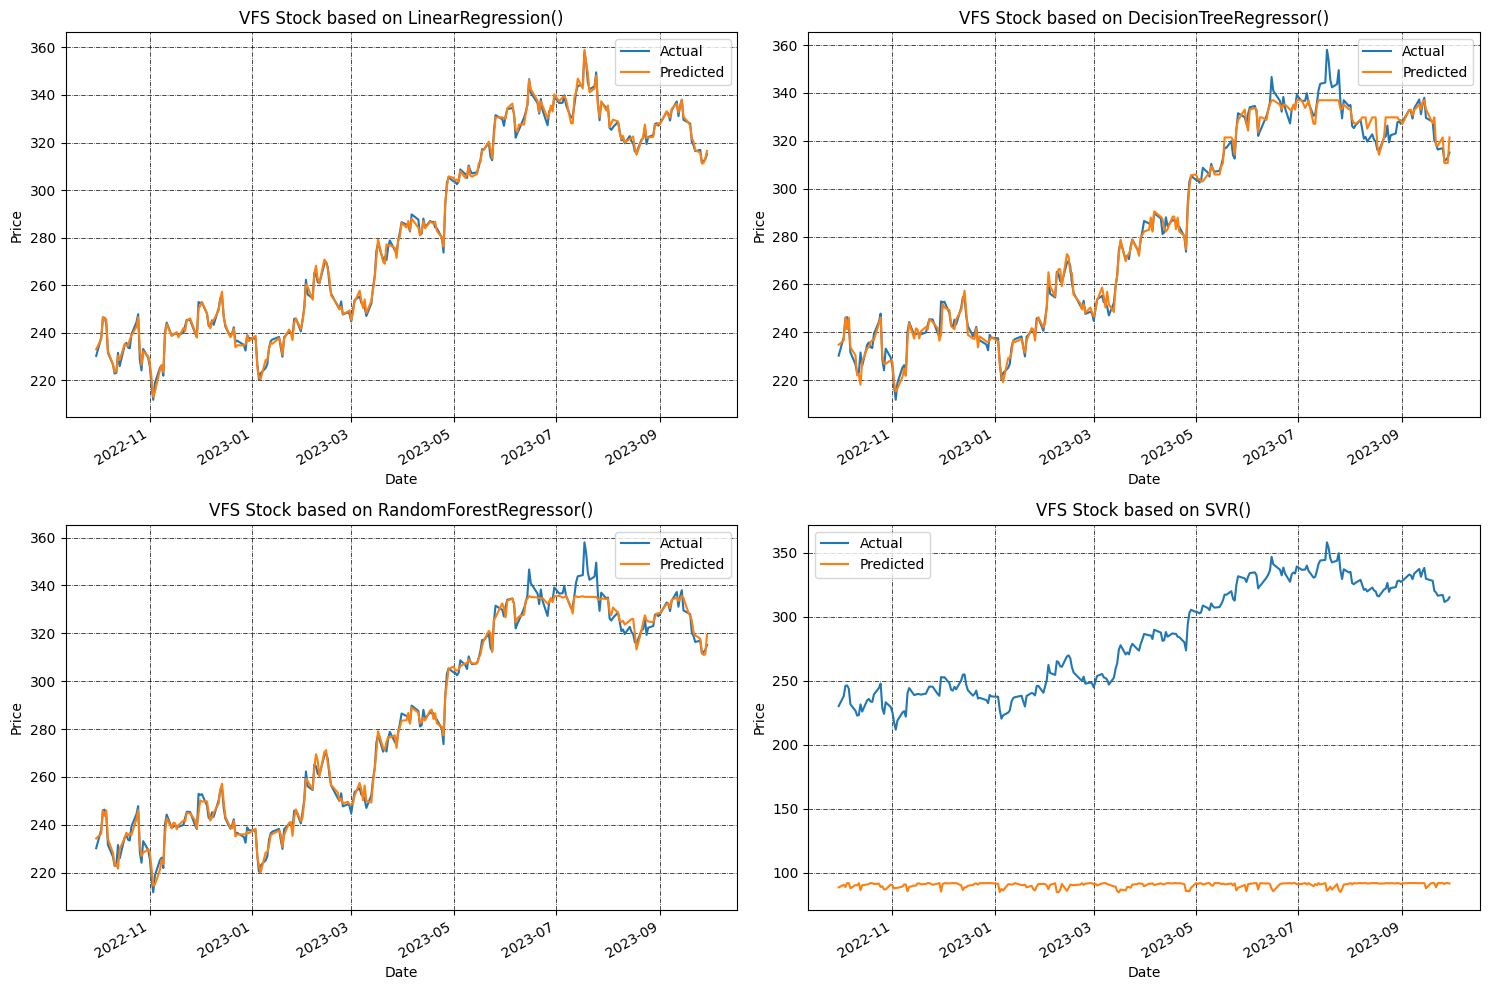

In [97]:
pipeline = [lr, tree, forest,svm]

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, model in enumerate(pipeline):
    model.fit(X_train, Y_train)
    Y_train_pred, Y_val_pred, Y_test_pred = generate_prediction(model, X_train, X_val, X_test)
    
    df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
    df_pred['Predicted'] = Y_val_pred
    
    # Plot on the corresponding subplot
    df_pred[['Actual', 'Predicted']].plot(ax=axes[i])
    axes[i].set_title(f'VFS Stock based on {model}', fontsize=12)
    axes[i].set_ylabel('Price', fontsize=10)
    axes[i].set_xlabel('Date', fontsize=10)
    axes[i].grid(which='major', color='k', linestyle='-.', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()



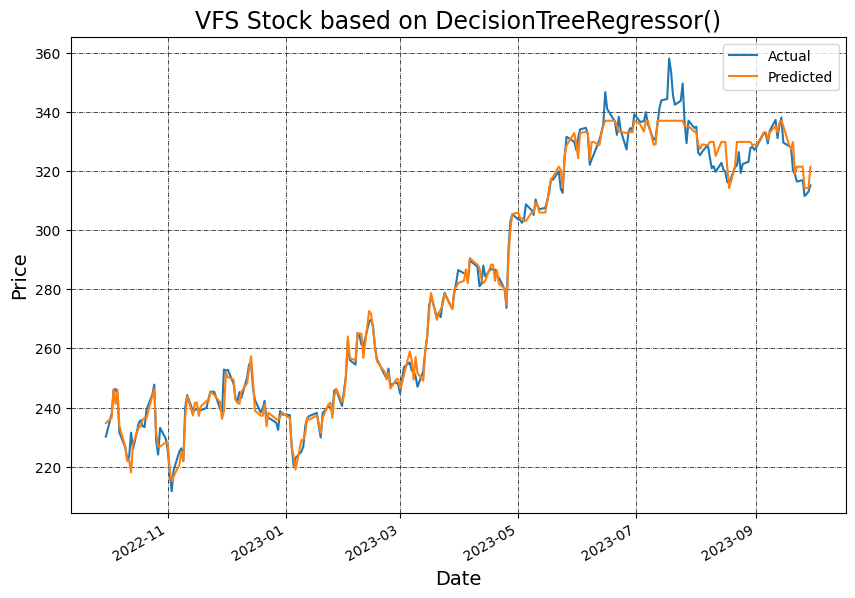

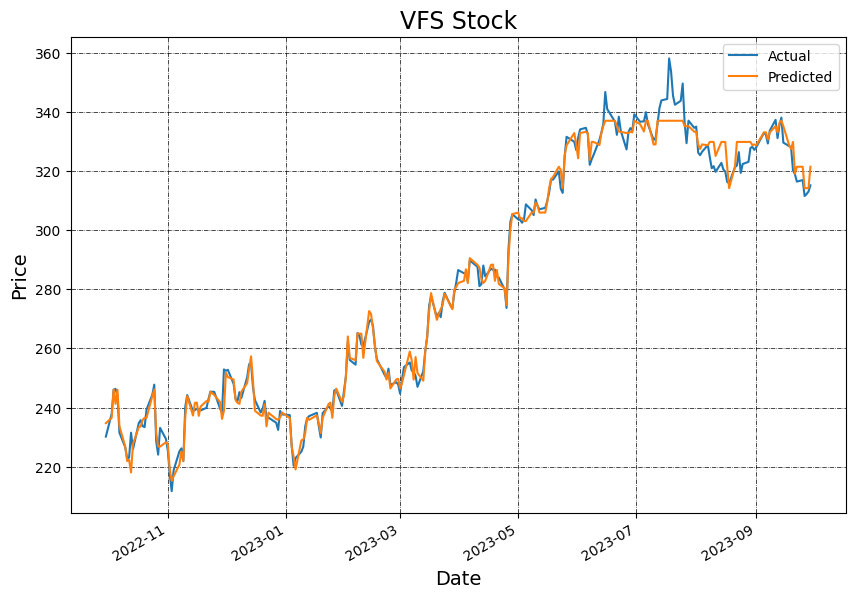

In [67]:

df_pred[['Actual', 'Predicted']].plot(figsize=(10,7))
plt.title('VFS Stock',fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.show()

In [13]:
# Define a function to calculate accuracy
def accuracy(y_true, y_pred):
  # Define a threshold
  threshold = 0.01
  # Calculate the percentage difference
  diff = np.abs(y_true - y_pred) / y_true
  # Return the accuracy score
  return np.mean(diff < threshold)

In [14]:
def evaluate(model, X_train, y_train, X_test, y_test):
  # Fit the model on the train set
  model.fit(X_train, y_train)
  # Predict on the test set
  y_pred = model.predict(X_test)
  # Calculate the metrics
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  acc = accuracy(y_test, y_pred)
  # Print the results
  print(f"MSE: {mse:.2f}")
  print(f"MAE: {mae:.2f}")
  print(f"Accuracy: {acc:.2f}")
  # Plot the predictions
  plt.figure(figsize=(10,6))
  plt.plot(y_test, label='Actual')
  plt.plot(y_pred, label='Predicted')
  plt.title(f"{model.__class__.__name__} Predictions")
  plt.xlabel('Date')
  plt.ylabel('Price ($)')
  plt.legend()
  plt.show()

In [15]:
# Define a function to perform cross validation
def cross_validate(model, X, y, cv=5):
  # Perform cross validation
  scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
  # Print the results
  print(f"Cross Validation MSE: {np.mean(-scores):.2f} (+/- {np.std(-scores):.2f})")

Linear Regression:
MSE: 0.10
MAE: 0.29
Accuracy: 0.12


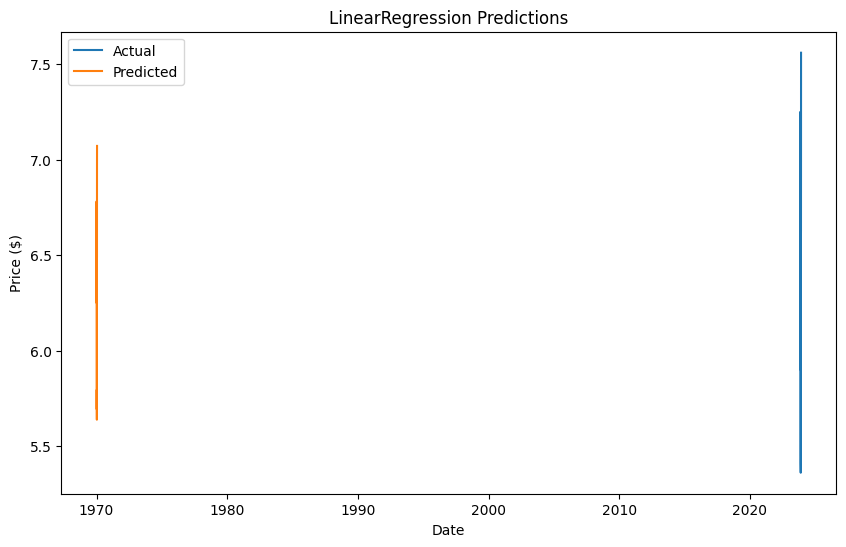

Cross Validation MSE: 6.53 (+/- 11.94)
Support Vector Regression:
MSE: 45.20
MAE: 6.62
Accuracy: 0.00


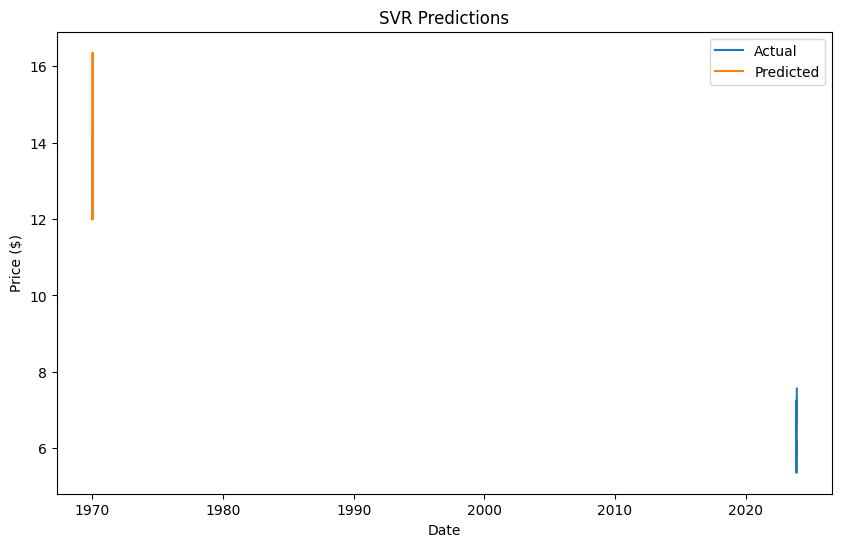

Cross Validation MSE: 323.87 (+/- 420.34)
Decision Tree Regressor:
MSE: 0.17
MAE: 0.28
Accuracy: 0.38


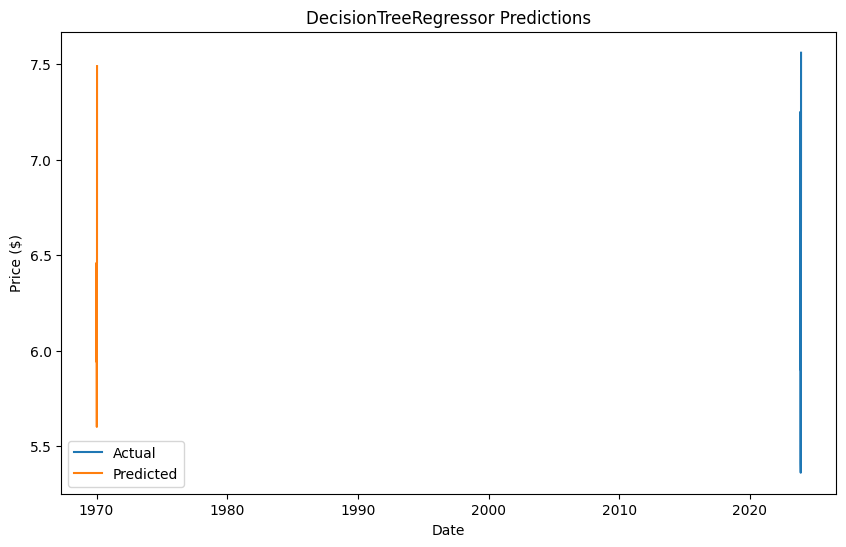

Cross Validation MSE: 47.04 (+/- 86.71)
Random Forest Regressor:
MSE: 0.09
MAE: 0.21
Accuracy: 0.25


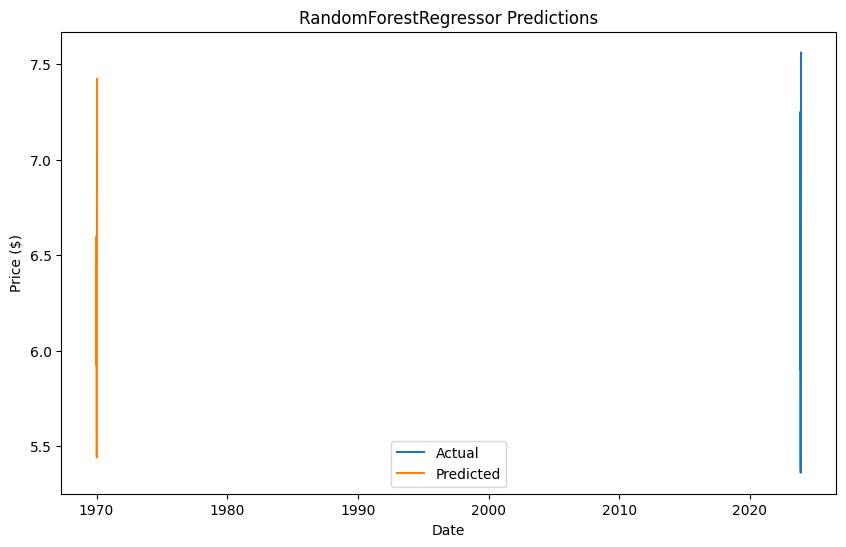

Cross Validation MSE: 60.47 (+/- 115.67)


In [18]:
# Linear Regression
lr = LinearRegression()
print("Linear Regression:")
evaluate(lr, X_train, y_train, X_test, y_test)
cross_validate(lr, X_train, y_train)

# Support Vector Regression (SVR)
svr = SVR()
print("Support Vector Regression:")
evaluate(svr, X_train, y_train, X_test, y_test)
cross_validate(svr, X_train, y_train)

# Decision Tree Regressor
dt = DecisionTreeRegressor()
print("Decision Tree Regressor:")
evaluate(dt, X_train, y_train, X_test, y_test)
cross_validate(dt, X_train, y_train)

# Random Forest Regressor
rf = RandomForestRegressor()
print("Random Forest Regressor:")
evaluate(rf, X_train, y_train, X_test, y_test)
cross_validate(rf, X_train, y_train)
